# Instructor Do: Random Forests

In [136]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import pyplot as plt
%matplotlib inline


## Loading and Preprocessing Loans Encoded Data

In [137]:
# Loading data
df_obesity = pd.read_csv("sources/ObesityDataSet.csv")
#Get unique values for column NObeyesdad
df_obesity['NObeyesdad'].unique()
#Turn values in the Nobeyesdad column into numbers
df_obesity['NObeyesdad'] = df_obesity['NObeyesdad'].map({'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6})

df_obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,2
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,3


In [138]:
# Define features set
X = df_obesity.copy()
X.drop("NObeyesdad", axis=1, inplace=True)
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [139]:
# Define target vector
y = df_obesity["NObeyesdad"].ravel()
y[:5]

C:\Users\USER\AppData\Local\Temp\ipykernel_27596\3369242908.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = df_obesity["NObeyesdad"].ravel()


array([1, 1, 1, 2, 3])

In [140]:
#One-hot encode categorical data
X = pd.get_dummies(X)
X.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,True,False,...,False,False,False,False,True,False,False,False,True,False
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,True,False,...,True,False,False,True,False,False,False,False,True,False
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,False,True,...,False,False,True,False,False,False,False,False,True,False
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,False,True,...,False,False,True,False,False,False,False,False,False,True
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,False,True,...,False,False,False,True,False,False,False,False,True,False


In [141]:
# Scale the numerical features
obesity_data_scaled = StandardScaler().fit_transform(X[["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]])

# Create a DataFrame with the scaled data
df_obesity_transformed = pd.DataFrame(
    obesity_data_scaled, columns=["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]
)

# Show the scaled data
df_obesity_transformed.head()




,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625


In [142]:
X.drop(["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"], axis=1, inplace=True)
X = pd.concat([X, df_obesity_transformed], axis=1)

X.head()

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,True,False,False,True,True,False,False,False,True,False,...,True,False,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,True,False,False,True,True,False,False,False,True,False,...,True,False,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,False,True,False,True,True,False,False,False,True,False,...,True,False,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,False,True,True,False,True,False,False,False,True,False,...,False,True,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,False,True,True,False,True,False,False,False,True,False,...,True,False,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625


In [143]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

## Fitting the Random Forest Model

In [144]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [145]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

## Making Predictions Using the Random Forest Model

In [146]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)

## Model Evaluation

In [147]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3", "Actual 4", "Actual 5", "Actual 6"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4", "Predicted 5", "Predicted 6"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [148]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6
Actual 0,67,3,0,0,0,0,0
Actual 1,3,64,1,1,0,0,0
Actual 2,0,7,61,4,1,0,0
Actual 3,0,2,4,69,1,1,0
Actual 4,0,2,0,4,92,0,0
Actual 5,0,0,0,0,0,69,0
Actual 6,0,0,0,0,0,0,72


Accuracy Score : 0.9356060606060606
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        70
           1       0.82      0.93      0.87        69
           2       0.92      0.84      0.88        73
           3       0.88      0.90      0.89        77
           4       0.98      0.94      0.96        98
           5       0.99      1.00      0.99        69
           6       1.00      1.00      1.00        72

    accuracy                           0.94       528
   macro avg       0.94      0.94      0.94       528
weighted avg       0.94      0.94      0.94       528



## Feature Importance

In [149]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(np.float64(0.27049881248209756), 'Weight'),
 (np.float64(0.08994576697669131), 'Age'),
 (np.float64(0.0851813875730376), 'FCVC'),
 (np.float64(0.08266026645491913), 'Height'),
 (np.float64(0.05275649977460053), 'NCP'),
 (np.float64(0.04746785952820524), 'TUE'),
 (np.float64(0.04409316531799867), 'FAF'),
 (np.float64(0.04379697888145736), 'CH2O'),
 (np.float64(0.036947828564054874), 'Gender_Female'),
 (np.float64(0.03674209915019851), 'Gender_Male'),
 (np.float64(0.02354300814118852), 'CALC_Sometimes'),
 (np.float64(0.022249185102240807), 'family_history_with_overweight_no'),
 (np.float64(0.02129530205110772), 'family_history_with_overweight_yes'),
 (np.float64(0.019520967788035158), 'CALC_no'),
 (np.float64(0.019482328049618317), 'CAEC_Sometimes'),
 (np.float64(0.016879129326921066), 'CAEC_Frequently'),
 (np.float64(0.01685835089417059), 'MTRANS_Public_Transportation'),
 (np.float64(0.013594334472118118), 'MTRANS_Automobile'),
 (np.float64(0.01249604129607297), 'FAVC_no'),
 (np.float

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

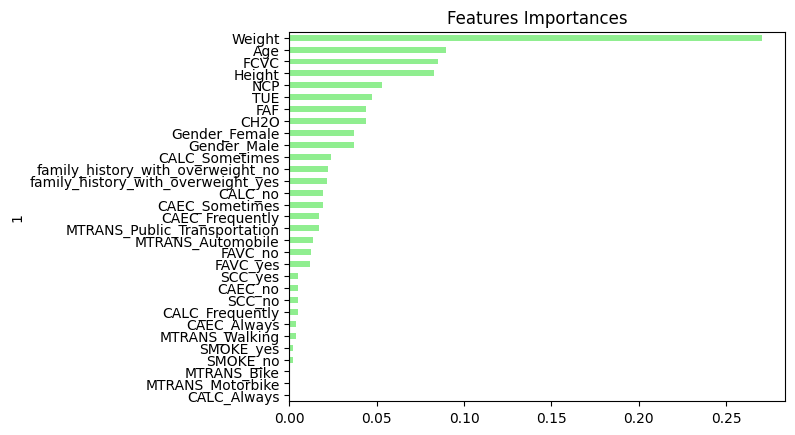

In [150]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)